<a href="https://colab.research.google.com/github/S7mitbarua/HAnalytics/blob/main/Healthcare_Analytics_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [2]:
# Generate synthetic patient data
np.random.seed(42)

In [3]:
# Simulating patient data
num_patients = 1000

In [5]:
# Simulate age, blood pressure, cholesterol, and a binary target variable (e.g., disease presence)
age = np.random.normal(loc=50, scale=10, size=num_patients)
blood_pressure = np.random.normal(loc=120, scale=10, size=num_patients)
cholesterol = np.random.normal(loc=200, scale=20, size=num_patients)
disease_presence = np.random.choice([0, 1], size=num_patients, p=[0.8, 0.2])

In [6]:
# Create a DataFrame
health_data = pd.DataFrame({'Age': age, 'BloodPressure': blood_pressure, 'Cholesterol': cholesterol, 'Disease': disease_presence})

In [7]:
# Display the first few rows of the generated data
print(health_data.head())

         Age  BloodPressure  Cholesterol  Disease
0  51.810627      99.096971   165.055567        0
1  63.032780     118.297418   201.892421        0
2  55.861658     117.343954   167.489119        0
3  45.875862     116.001218   149.868569        0
4  52.571990     118.853592   205.949241        0


In [8]:
# Basic data exploration
print(health_data.describe())

               Age  BloodPressure  Cholesterol     Disease
count  1000.000000    1000.000000  1000.000000  1000.00000
mean     49.402228     119.727922   199.209943     0.18300
std       9.854706       9.842982    20.691220     0.38686
min      18.232962      91.669697   142.009722     0.00000
25%      43.014764     113.368082   184.767059     0.00000
50%      49.789130     119.571729   199.171910     0.00000
75%      56.064310     126.264606   213.708640     0.00000
max      81.520567     151.129102   261.965989     1.00000


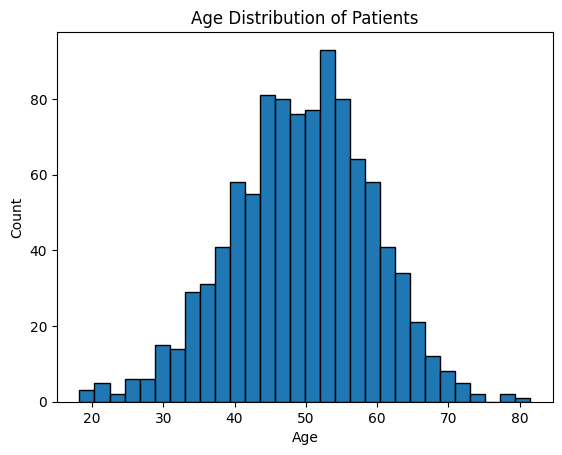

In [9]:
# Visualize age distribution
plt.hist(health_data['Age'], bins=30, edgecolor='black')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

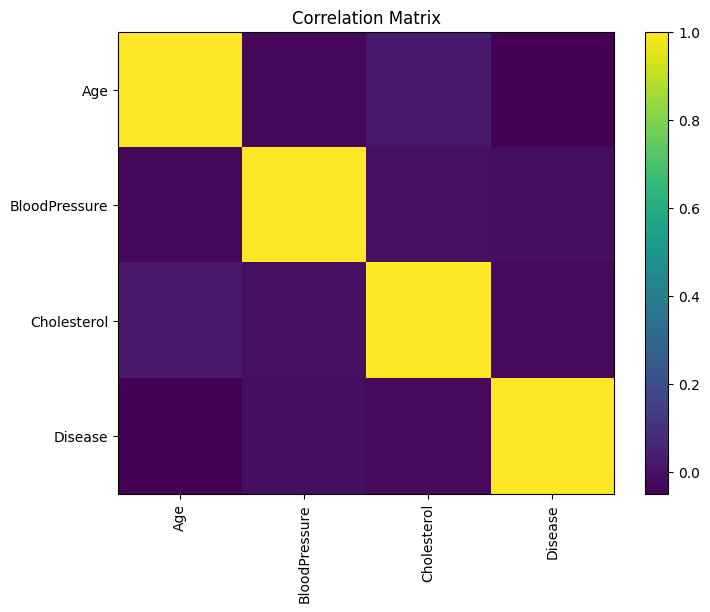

In [10]:
# Visualize correlation between variables
correlation_matrix = health_data.corr()
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='viridis', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

In [12]:
# Split the data into training and testing sets
X = health_data[['Age', 'BloodPressure', 'Cholesterol']]
y = health_data['Disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# Train a logistic regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [15]:
# Make predictions on the test set
y_pred = logreg_model.predict(X_test_scaled)

In [16]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [17]:
print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.82
Confusion Matrix:
[[165   0]
 [ 35   0]]


In [18]:
# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

In [20]:
# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)

In [21]:
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')
print(f'Classification Report:\n{classification_report_rf}')

Random Forest Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.99      0.90       165
           1       0.00      0.00      0.00        35

    accuracy                           0.81       200
   macro avg       0.41      0.49      0.45       200
weighted avg       0.68      0.81      0.74       200

